# Phase 2 :

Read dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('Dataset/heart.attack.csv')

# Attributes’ description table:

In [ ]:
data = {
    "Attribute Name": [
        "Patient ID", "Age", "Sex", "Cholesterol", "Systolic BP","Diastolic BP", "Heart Rate", "Diabetes", 
        "Family History", "Smoking", "Diet", "Continent", "Heart Attack Risk"
    ],
    "Description": [
        "Unique id of the patient", "Patient's age", "Gender of the patient", "Exam result of cholesterol", 
        "Result of systolic blood pressure", "Result of diastolic blood pressure","Heart beats", "Diabetes? 1 means the patient has diabetes, 0 means the patient does not have diabetes", 
        "Has the family heart attack story? 1 means the patient has a family heart attack history. 0 means he does not have", 
        "Smoking or not? 1 means the patient is smoking, 0 means he does not", 
        "The patient on diet or not?", "On which continent is the patient located?", 
        "The patient's risk of having a heart attack, 1 means the patient has heart attack risk, 0 means he does not have"
    ],
    "Data Type": [
        "Nominal", "Numeric", "Binary", "Numeric","Numeric", "Numeric", "Numeric", "Binary", 
        "Binary", "Binary", "Nominal", "Nominal", "Binary"
    ],
    "Possible Values": [
        "", "Range between 18-90", "Female, Male", "Range between 120-400", "Range between 90-180", "Range between 60-110","Range between 40-110", "0,1", 
        "0,1", "0,1", '"Average", "Healthy", "Unhealthy"', 
        '"Europe", "Africa", "Australia", "Asia", "South America", "North America"', "0,1"
    ]
}

g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Attribute Name,Description,Data Type,Possible Values
0,Patient ID,Unique id of the patient,Nominal,
1,Age,Patient's age,Numeric,Range between 18-90
2,Sex,Gender of the patient,Binary,"Female, Male"
3,Cholesterol,Exam result of cholesterol,Numeric,Range between 120-400
4,Systolic BP,Result of systolic blood pressure,Numeric,Range between 90-180
5,Diastolic BP,Result of diastolic blood pressure,Numeric,Range between 60-110
6,Heart Rate,Heart beats,Numeric,Range between 40-110
7,Diabetes,"Diabetes? 1 means the patient has diabetes, 0 means the patient does not have diabetes",Binary,"0,1"
8,Family History,Has the family heart attack story? 1 means the patient has a family heart attack history. 0 means he does not have,Binary,"0,1"
9,Smoking,"Smoking or not? 1 means the patient is smoking, 0 means he does not",Binary,"0,1"


# Sample of 20 people from the dataset:

In [3]:
sample=df.sample(n=20);
sample

,Patient ID,Age,Sex,Cholesterol,Systolic BP,Diastolic BP,Heart Rate,Diabetes,Family History,Smoking,Diet,Continent,Heart Attack Risk
3865,POT5123,27,Female,374,98,110,45,1,0,0,Average,Europe,0
3560,RVL7813,40,Female,186,154,95,104,0,0,0,Unhealthy,Africa,1
2974,OHG2804,27,Female,129,119,105,99,1,0,0,Average,Australia,0
435,WMO3684,26,Male,183,177,103,93,0,0,1,Healthy,Asia,0
720,YJB7133,58,Female,288,165,92,52,1,0,1,Average,Europe,0
1991,BQZ1708,87,Female,256,107,106,70,1,1,1,Unhealthy,Europe,0
2255,ADG3622,27,Female,184,141,72,59,1,1,0,Unhealthy,Europe,0
3884,HVY7779,23,Female,200,116,61,95,1,1,0,Average,South America,1
234,MYI3162,45,Male,328,99,90,78,1,1,1,Average,Europe,0
1950,JXK1460,40,Male,175,130,103,68,0,1,1,Unhealthy,Europe,0


These are 20 random samples from the dataset.

# Show the missing values:


In [4]:
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
Patient ID           0
 Age                 0
Sex                  0
 Cholesterol         0
Systolic BP          0
Diastolic BP         0
 Heart Rate          0
Diabetes             0
Family History       0
Smoking              0
Diet                 0
Continent            0
Heart Attack Risk    0
dtype: int64

Rows with missing values:
0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Length: 4000, dtype: int64


We notice that there are no missing values, and all columns are complete.

Understanding the data through graph representations:
--
The "heart attack risk" class name was primarily utilized to comprehend the relationship between heart attack and all attributes, specifically how they are associated with the probability of having a heart attack. It indicates which individuals are affected and whether they are not by linking to every attribute in the data. It also helps determine the gender differences in heart attack risk and the relationship between age and heart attack risk. This makes it easier to understand the factors influencing this condition and to find signs that could aid in an early diagnosis.

Sex
Male      0.69675
Female    0.30325
Name: proportion, dtype: float64


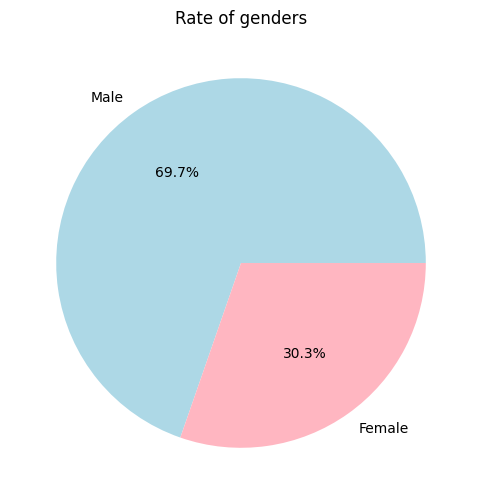

In [ ]:
data2 = df ['Sex'].value_counts(normalize=True)
print(data2)
name = df['Sex'].value_counts().index.tolist()
value = df['Sex'].value_counts().tolist()
fig = plt.figure(figsize=(6,6))
plt.pie(value, labels=name,autopct='%1.1f%%',colors=['#ADD8E6','#FFB6C1'])
plt.title('Rate of genders')
plt.show()

We used a pie chart to illustrate the percentage distribution of each gender in the total sample, which shows that men are significantly more likely to suffer a heart attack than women.

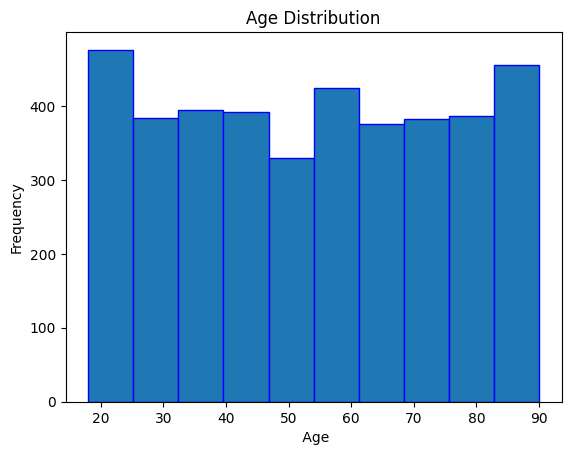

In [6]:
ages = df[' Age']
plt.hist(ages , bins = 10, edgecolor = 'blue')
plt.title('Age Distribution')
plt.xlabel(' Age')
plt.ylabel('Frequency')

plt.show;

The histogram illustrates the age distribution of the study participants, indicating that individuals in their twenties are the most likely to participate.

 Heart Rate
72     0.01875
81     0.01850
94     0.01775
57     0.01775
97     0.01700
        ...   
70     0.01175
103    0.01125
106    0.01125
73     0.01050
96     0.01025
Name: proportion, Length: 71, dtype: float64


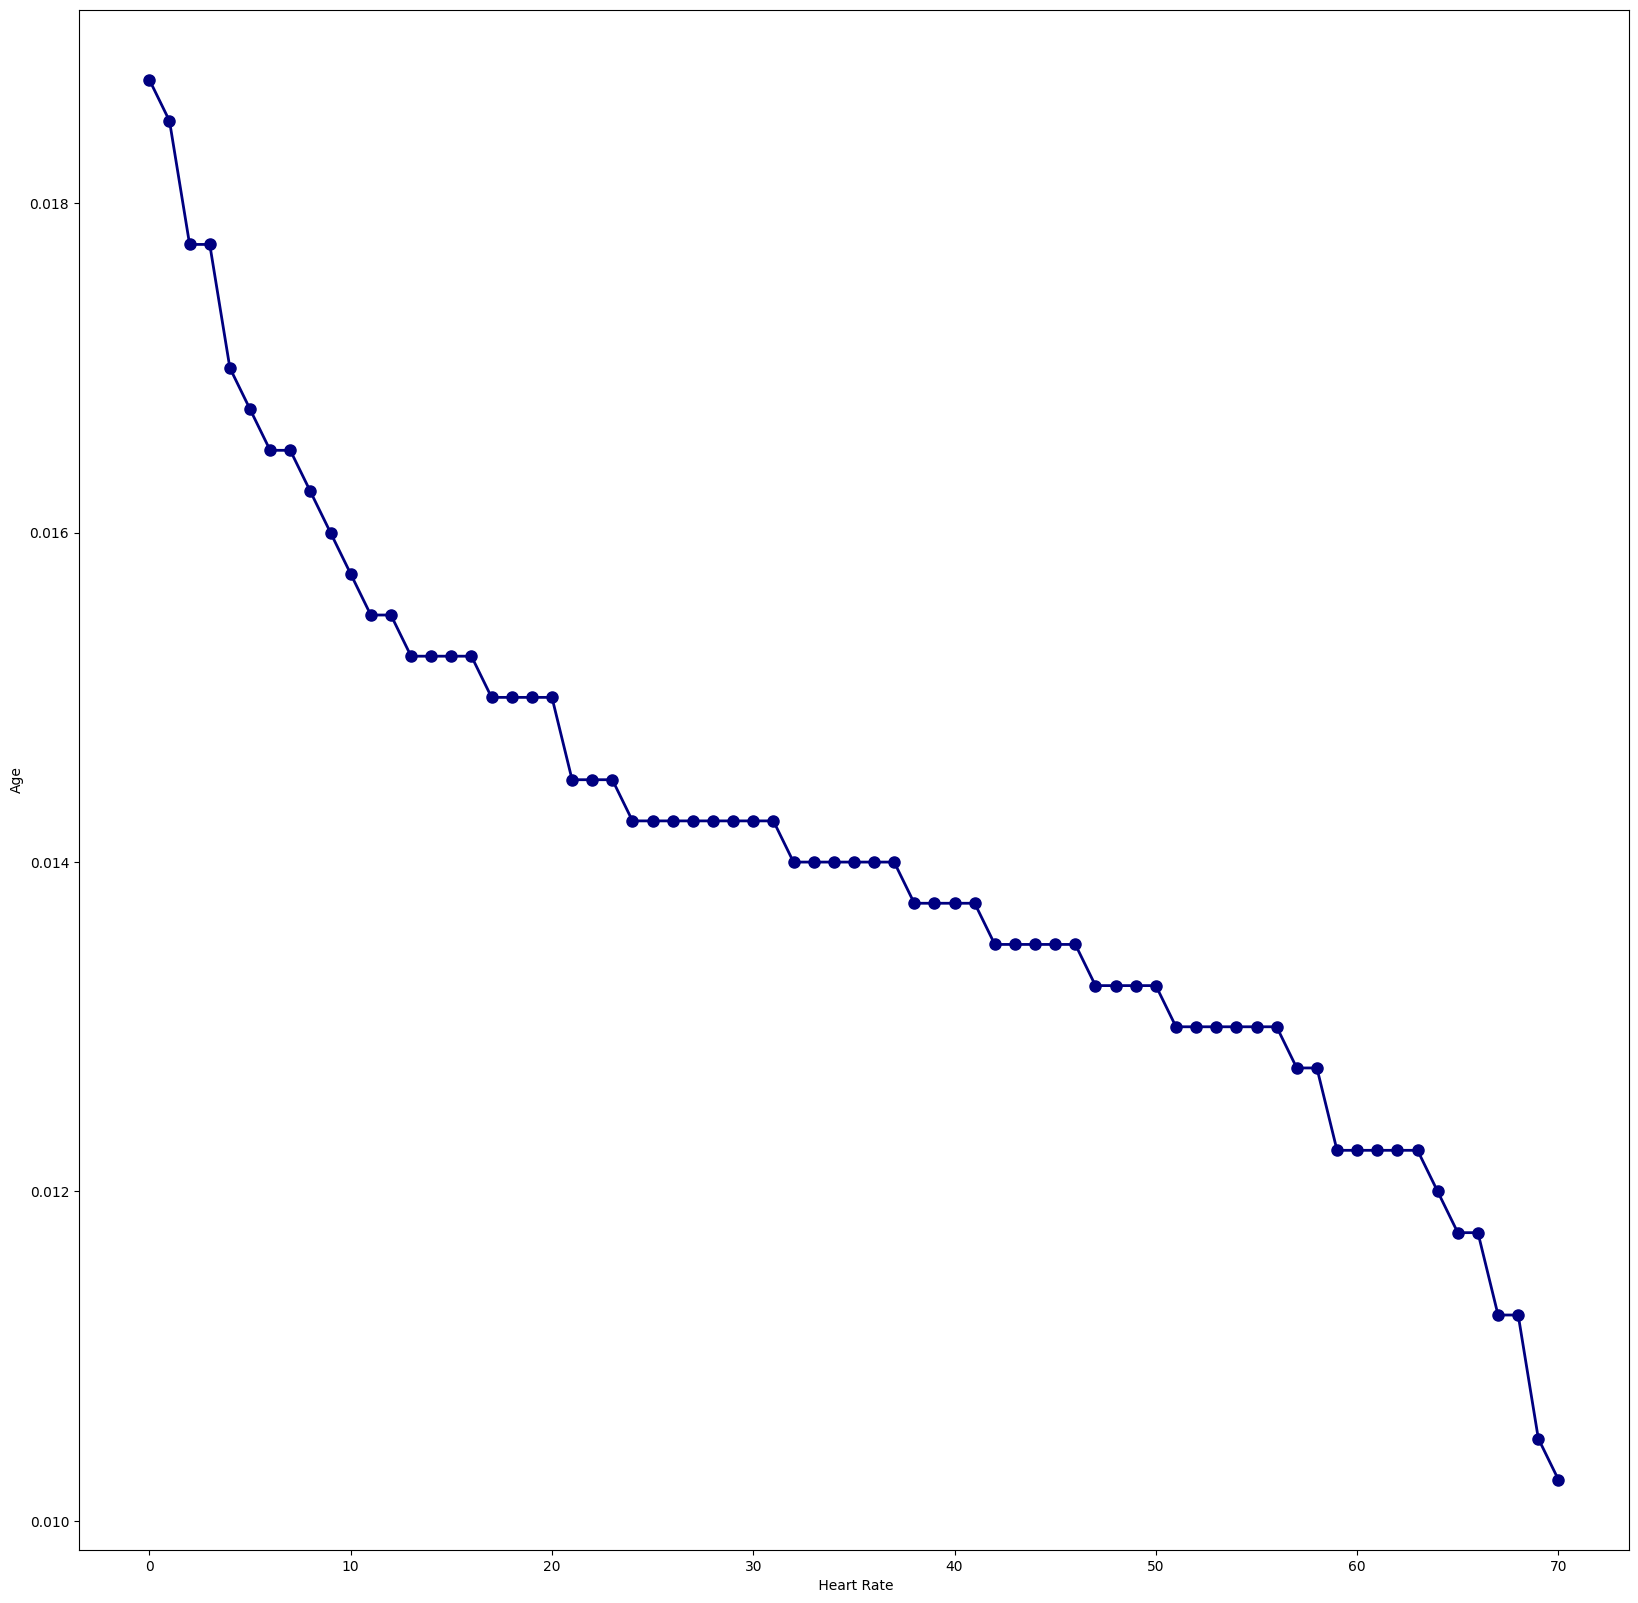

In [7]:
data3 = df[' Heart Rate'].value_counts(normalize=True)
print(data3)
x = range(len(data3))
y= data3.values
plt.figure(figsize=(20,20))
plt.plot(x,y, color='#000080', marker='o', linestyle='-', linewidth=2, markersize=8, label='Pink Line')
plt.xlabel(' Heart Rate')
plt.ylabel('Age')
plt.show()

The chart scatter plot shows that the relationship between age and heart rate is an inverse relationship, where the older a person gets, the lower the heart rate. In addition, a lower heart rate may lead to the risk of a heart attack.

Heart Attack Risk
0    53.7
1    46.3
Name: proportion, dtype: float64


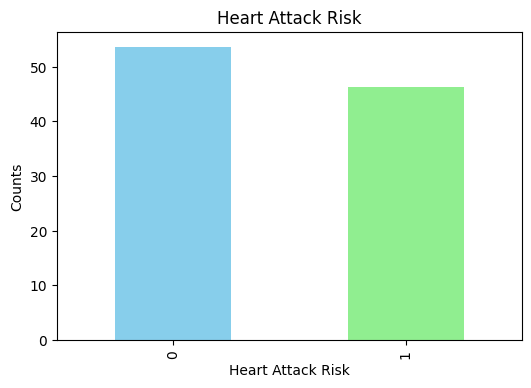

In [8]:
data4=df['Heart Attack Risk'].value_counts(normalize=True)*100
print(data4)
plt.figure(figsize=(6, 4))
data4.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Counts')
plt.show()

The bar chart illustrates the numerical differences between class label, while the classification results reveal a balance in heart attack risk between individuals at risk and those not at risk.

Heart Attack Risk     0     1
Diabetes Smoking             
0        0           84    70
         1          659   569
1        0          124   143
         1         1281  1070


Text(0, 0.5, 'Number of Patients')

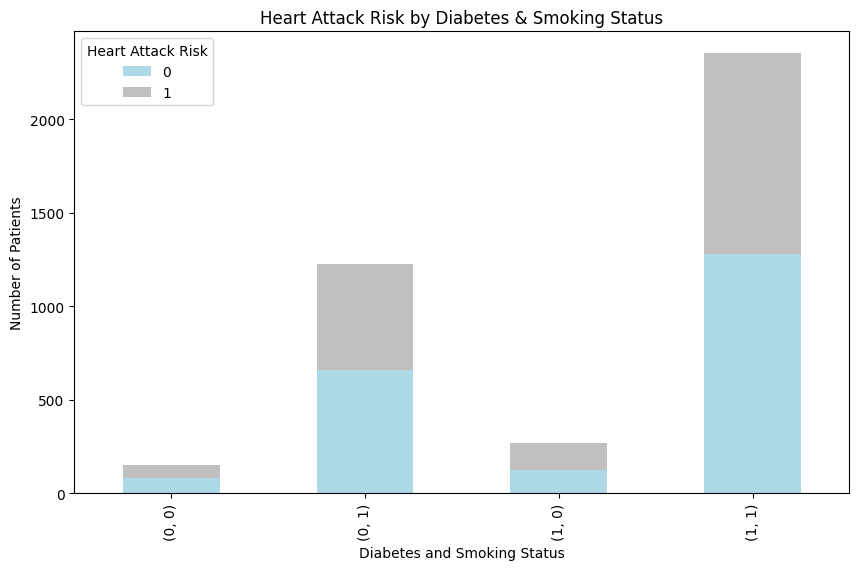

In [9]:
crosstab_data = pd.crosstab([df['Diabetes'], df['Smoking']], df['Heart Attack Risk'])
print(crosstab_data)
ax = crosstab_data.plot(kind='bar', stacked=True, color= ['lightBlue', 'silver'], figsize=(10, 6))

plt.title('Heart Attack Risk by Diabetes & Smoking Status')
plt.xlabel('Diabetes and Smoking Status')
plt.ylabel('Number of Patients')


In this stacked bar chart, we are visualizing the impact of the two variables, (Diabetes and Smoking), on heart attack risk.
The graph illustrates: 
1) No Diabetes, No Smoking: Very few patients are at risk of a heart attack, with both risk categories (0 and 1) being almost equally small.
2) No Diabetes, Smoking: A larger number of patients, with a noticeable portion at risk (1). Smoking clearly increases the heart attack risk here.
3) Diabetes, No Smoking: Similar to the "No Diabetes, No Smoking" category, there are fewer patients overall, with a small proportion at risk.
4) Diabetes, Smoking: This category has the highest number of patients, with a significant portion at risk for a heart attack.

This concludes that Smoking seems to play a major role in increasing heart attack risk, regardless of diabetes status.
Diabetes alone shows a smaller effect on heart attack risk compared to smoking, but when combined with smoking, the risk becomes much more pronounced.

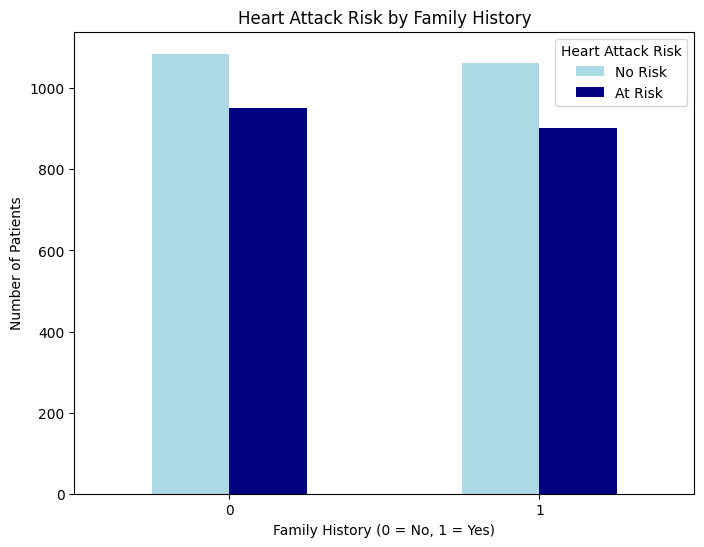

In [10]:
family_history_counts = df.groupby(['Family History', 'Heart Attack Risk']).size().unstack()

family_history_counts.plot(kind='bar', figsize=(8, 6), color=['lightBlue', 'navy'])
plt.title('Heart Attack Risk by Family History')
plt.xlabel('Family History (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Attack Risk', labels=['No Risk', 'At Risk'])
plt.xticks(rotation=0)
plt.show()

This is a grouped bar chart that compares the number of patients with and without a family history of heart disease across two different values of heart attack risk(0-1).
As shown by the graph , there is no impact on heart attack risk from family history 
as the 2 bars with family history and without are almost equal to eachother.

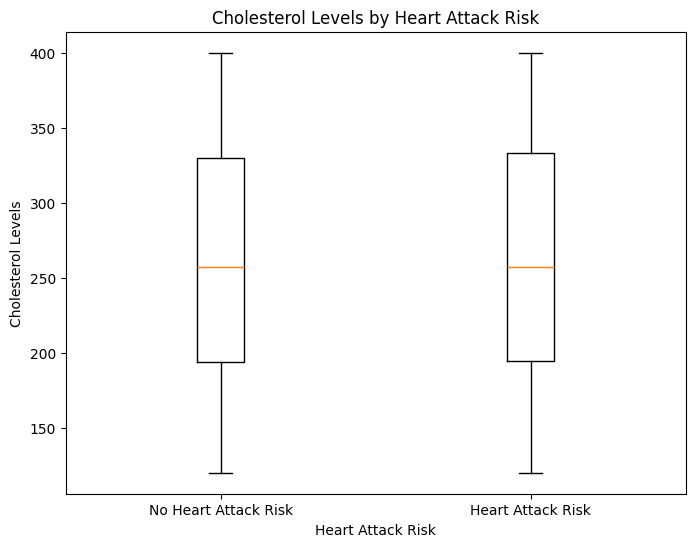

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Heart Attack Risk'] == 0][' Cholesterol'], 
             df[df['Heart Attack Risk'] == 1][' Cholesterol']],
            tick_labels=['No Heart Attack Risk', 'Heart Attack Risk'])

plt.title('Cholesterol Levels by Heart Attack Risk')
plt.ylabel('Cholesterol Levels')
plt.xlabel('Heart Attack Risk')
plt.show()

This ia a BoxPlot that compares the distribution of cholesterol levels between patients with and without a heart attack risk, allowing you to see the spread, median, and potential outliers in each group
Median:

Both groups have a similar median cholesterol level, indicating that the central tendency of cholesterol is approximately the same for patients with and without heart attack risk.

- IQR:

The spread of cholesterol levels (IQR) appears to be similar for both groups, showing that cholesterol variability is comparable in both populations.

- Whiskers:

The whiskers extend to the minimum and maximum values (within 1.5 times the IQR), and both groups exhibit similar ranges in cholesterol levels.

- Potential Outliers:

There are no visible outliers in this plot, as all the data points lie within the whiskers.

This suggests that other factors in the dataset could have a stronger influence on heart attack risk than cholesterol alone.

# Summary for data:

In [ ]:
summary=df.describe();
print(summary);

               Age   Cholesterol  Systolic BP  Diastolic BP   Heart Rate  \
count  4000.000000   4000.000000  4000.000000   4000.000000  4000.000000   
mean     53.759000    260.714500   134.875250     85.229500    74.925750   
std      21.503942     80.671345    26.434218     14.738322    20.368148   
min      18.000000    120.000000    90.000000     60.000000    40.000000   
25%      35.000000    194.000000   111.000000     73.000000    57.000000   
50%      54.000000    257.000000   135.000000     85.000000    75.000000   
75%      73.000000    331.000000   158.000000     98.000000    93.000000   
max      90.000000    400.000000   180.000000    110.000000   110.000000   

         Diabetes  Family History      Smoking  Heart Attack Risk  
count  4000.00000     4000.000000  4000.000000        4000.000000  
mean      0.65450        0.491000     0.894750           0.463000  
std       0.47559        0.499981     0.306914           0.498691  
min       0.00000        0.000000     0.000

Show the Min, 1st Q, Median, Mean ,3rd Q ,Max for each numeric column:
-
using the summary_stats() function, we observed several points from these summary statistics, such as:

- Age: There is significant variability in ages, ranging from 18 to 90 years, with an average of 53.75 years. This indicates that the risk of a heart attack is spread across individuals within a wide age range.

- Cholesterol: The values vary significantly, with a maximum of 400 and a minimum of 120. The mean is 260.71 which is slightly higher than the median 257 (slight skwe in distribution), and a standard deviation of 80.67, which indicates considerable variability in cholesterol levels                 

- Heart Rate: Heart Rate values range from 40 bpm to 110 bpm which indiactes a wide range, with a mean of 74.9 bpm, which is within the normal heart rate range, and a median of 75 that is very close to the mean, suggesting that the heart rate distribution is relatively symmetrical , and with a standard deviation of 20.36 which indicates variability in heart rates among individuals.

- Diabetes: The values are binary, limited to 0 and 1,  with a mean of  0.65, indicating that a significant portion of the population may have diabetes.

- Family History: The values are binary, limited to 0 and 1, with a mean of 0.491 indicating that nearly half of the observations report a family history of heart attack risk, and a standard deviation of 0.499981 which indicates that there is roughly equal proportions of individuals with and without family history.

- Smoking: The values are binary, limited to 0 and 1, with a mean of 0.894, The mean indicates a high prevalence of smoking within the dataset,the median being 1 confirms that at least half of the individuals in the dataset are smokers, indicating a skewed distribution towards smoking behavior, standard deviation being 0.3069 suggests variability in smoking status, but since the mean is close to 1, it indicates that most individuals in the dataset are smokers. The presence of non-smokers (0) is less common.

- Systolic BP: The values vary, with a maximum of 180 and a minimum of 90, with the mean being 134.875 which is very close to the median 135, suggesting that the distribution is likely symmetrical which indicates a balanced spread of values around the center (no significant outliers),the standard deviation being 26.434 is relatively large compared to the mean, indicating considerable variability in systolic BP observations (wide range of blood pressure levels).

- Diastolic BP: Diastolic BP values range from 60 to 110, with a mean of 85.23 that is slightly higher than the median 85, the standard deviation being 14.74 makes it significantly a portion of the mean,indicating some variability in the diastolic BP observations. 

- Heart Attack Risk: The values are binary, limited to 0 and 1, with a mean of 0.463 and a standard deviation of 0.498691 which suggests considerable variability in heart attack risk among the observations, with many individuals falling towards both ends of the risk spectrum.

# Calculate the variance :

In [13]:
variance= df.var(numeric_only=True);
print(variance)

 Age                  462.419524
 Cholesterol         6507.865956
Systolic BP           698.767879
Diastolic BP          217.218134
 Heart Rate           414.861452
Diabetes                0.226186
Family History          0.249981
Smoking                 0.094196
Heart Attack Risk       0.248693
dtype: float64


Variance helps us understand the extent of dispersion or scatter of values in each column. As variance increases, it indicates that the values are more spread out from the mean; conversely, decreasing variance suggests that the values are more closely clustered around the mean. Therefore, our variance results indicate the following:

- Age, Systolic BP, Diastolic BP, Heart Rate: These columns exhibit high variance, indicating a significant level of dispersion and spread of values.

- Cholesterol: This column shows very high variance, reflecting an even greater level of dispersion.

- Diabetes, Family History, Smoking, and Heart Attack Risk: These columns have moderate to low variance, suggesting a moderate to low degree of dispersion and value spread."

# Data Preprocessing:
# Show outliers:

In [14]:
# Detecting outliers with IQR
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)


selected_columns = [' Age', ' Cholesterol','Systolic BP','Diastolic BP', ' Heart Rate']  
outlier_counts = {column: 0 for column in selected_columns}

for column in selected_columns:
    outliers = count_outliers(df[column])
    outlier_counts[column] = outliers

total_rows_with_outliers = sum(outlier_counts.values())

print("Outlier Counts:")
for column in selected_columns:
    count = outlier_counts[column]
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")


Outlier Counts:
 Age: 0 rows with outliers
 Cholesterol: 0 rows with outliers
Systolic BP: 0 rows with outliers
Diastolic BP: 0 rows with outliers
 Heart Rate: 0 rows with outliers
Total Rows with Outliers: 0


Outliers are identified using the IQR method with an outlier threshold of 1.5.

 The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1).

An upper bound is defined as Q3+(1.5 x IQR)

A lower bound is defined as Q1-(1.5 × IQR)

Data points falling outside these bounds are considered outliers

The output indicates there are no Outliers in all numeric columns.

# Show duplicates :

In [15]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


This indicates that there are no duplicate rows in the dataset.

# Correlation Coefficient:

Correlation coefficient between  Age and  Cholesterol: -0.009094960238451839
Correlation coefficient between  Age and Systolic BP: 0.0002062039547510348
Correlation coefficient between  Age and Diastolic BP: -0.02546431905829374
Correlation coefficient between  Age and  Heart Rate: -0.005995611641085187
Correlation coefficient between  Cholesterol and Systolic BP: 0.00487529254971903
Correlation coefficient between  Cholesterol and Diastolic BP: 0.011497810577428526
Correlation coefficient between  Cholesterol and  Heart Rate: 0.0013856946952423806
Correlation coefficient between Systolic BP and Diastolic BP: 0.02938362204384109
Correlation coefficient between Systolic BP and  Heart Rate: -0.0027745943346274278
Correlation coefficient between Diastolic BP and  Heart Rate: -0.027208395895349412


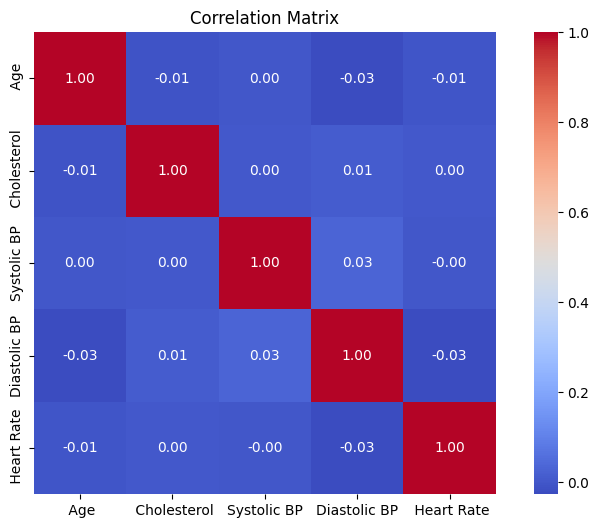

In [16]:
df = df.dropna()

columns = [' Age',' Cholesterol','Systolic BP','Diastolic BP',' Heart Rate' ]

correlation_results = {}

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        data_col1 = df[col1]
        data_col2 = df[col2]

        correlation_coefficient = np.corrcoef(data_col1, data_col2)[0, 1]
        correlation_results[(col1, col2)] = correlation_coefficient
        print(f"Correlation coefficient between {col1} and {col2}: {correlation_coefficient}")
plt.figure(figsize=(10, 6))
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

The aim of this analysis is to investigate the relationships between various numerical variables associated with health data, including Heart Rate, Systolic Blood Pressure (BP), Diastolic BP, Age, and Cholesterol. To determine how closely related two variables are, the correlation coefficient is determined. The correlation coefficient's value (range from -1 to 1) indicates the relationship's strength and direction:

• A value close to 1 suggests a significant positive association (as one variable increases, so does the other).

• A value close to -1 implies a significant negative association (one variable increases while the other falls).

• A number approaching 0 suggests there is no linear relationship between variables.

1. Age and Cholesterol: ,Correlation coefficient: -0.009 Close to 0, showing no significant linear association between age and cholesterol levels.
2. Age and Systolic Blood Pressure: ,Correlation coefficient: 0.0002 ,This value is extremely near to zero, indicating no correlation in this dataset.
3. Age and Diastolic Blood Pressure ,Correlation coefficient: -0.025 ,Weak negative value indicates no significant association between the two variables.
4. Age and Heart Rate ,Correlation coefficient: -0.006 ,Correlation is nearly zero, showing no significant association between the two.
5. Cholesterol and Systolic Blood Pressure ,Correlation coefficient: 0.0049 ,Value close to zero indicates no significant relationship.
6. Cholesterol and Diastolic Blood Pressure ,Correlation coefficient: 0.0115 ,This little positive number indicates a weak and inconsequential association between the two.
7. Cholesterol and Heart Rate ,correlation coefficient: 0.0014 ,Nearly zero, indicating no meaningful link.
8. Systolic and diastolic blood pressure ,Correlation coefficient: 0.029 ,A modest positive number indicates a poor association between the two.
9. Systolic blood pressure and heart rate ,Correlation coefficient: -0.0028 ,Close to 0, showing no meaningful association between the two variables.
10. Measure diastolic blood pressure and heart rate, Correlation coefficient : -0.027 ,A weak negative association between diastolic blood pressure and heart rate.

There are no significant or strong linear correlations between any of the health metrics in this dataset, since all correlation coefficients are extremely close to 0.

# Chi squared:

In [ ]:
categorical_columns = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Diet', 'Continent']

for column in categorical_columns:
    print(f"\nChi-Square Test for {column} and Heart Attack Risk:")

    contingency_table = pd.crosstab(df[column], df['Heart Attack Risk'])
    print("Contingency Table:")
    print(contingency_table)

    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)


Chi-Square Test for Sex and Heart Attack Risk:
Contingency Table:
Heart Attack Risk     0     1
Sex                          
Female              639   574
Male               1509  1278
Chi-Square Statistic: 0.6717581386257074
P-Value: 0.4124393106850527
Degrees of Freedom: 1
Expected Frequencies:
[[ 651.381  561.619]
 [1496.619 1290.381]]

Chi-Square Test for Diabetes and Heart Attack Risk:
Contingency Table:
Heart Attack Risk     0     1
Diabetes                     
0                   743   639
1                  1405  1213
Chi-Square Statistic: 0.0005956473310359398
P-Value: 0.9805288524025058
Degrees of Freedom: 1
Expected Frequencies:
[[ 742.134  639.866]
 [1405.866 1212.134]]

Chi-Square Test for Family History and Heart Attack Risk:
Contingency Table:
Heart Attack Risk     0    1
Family History              
0                  1085  951
1                  1063  901
Chi-Square Statistic: 0.24679185087103006
P-Value: 0.6193431480858171
Degrees of Freedom: 1
Expected Frequencies

To investigate the association between a number of categorical factors (including sex, diabetes, family history, smoking, diet, and continent) and the chance of having a heart attack, we are using a chi-square test in this investigation. Finding out if these factors are statistically related to the likelihood of a heart attack risk. The crucial point to remember is that a strong correlation is present when the p-value obtained from the chi-square test is less than 0.05, indicating that the link between the variable and the chance of having a heart attack is deemed statistically significant. However, the link is weak or not statistically significant if the p-value is higher than 0.05.
1. Sex has a slight connection with heart attack risk, as indicated by the chi-square statistic (p-value > 0.05). This shows that there is no clear link between sex and heart attack risk.
2. Diabetes: Similar to sex, the chi-square test shows a weak correlation with a p-value larger than 0.05, suggesting that diabetes does not significantly increase the risk of a heart attack.
3. Family History: Although a bit stronger than sex and diabetes, the p-value remains above 0.05, indicating no statistical significance.
4. Smoking had a higher chi-square value, indicating a greater link with heart attack risk. However, the p-value is more than 0.05 but near to 0.05 (0.069), indicating that smoking has a notable, although not statistically significant, association with heart attack risk. If the p-value had been a little smaller, smoking would have been an important influence.
5. Diet: The chi-square test indicates a weak connection (p-value larger than 0.05) between diet categories (average, healthy, unhealthy) and heart attack risk.
6. Continent: Although there is considerable difference in heart attack risk among continents, the p-value is likely more than 0.05, indicating that the connection is not statistically significant.

In [ ]:
binary_columns = ['Diabetes', 'Family History', 'Smoking','Diet','Continent','Sex']

results = {}

for i in range(len(binary_columns)):
    for j in range(i + 1, len(binary_columns)):
        col1 = binary_columns[i]
        col2 = binary_columns[j]

        contingency_table = pd.crosstab(df[col1], df[col2])

        print(f"\nContingency Table for {col1} and {col2}:")
        print(contingency_table)

        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        results[(col1, col2)] = {
            'Chi-Square Statistic': chi2_stat,
            'P-Value': p_value,
            'Degrees of Freedom': dof,
            'Expected Frequencies': expected
        }

        print(f"\nChi-Square Statistic for {col1} and {col2}: {chi2_stat}")
        print(f"P-Value for {col1} and {col2}: {p_value}")
        print(f"Degrees of Freedom for {col1} and {col2}: {dof}")
        print("Expected Frequencies:")
        print(expected)


Contingency Table for Diabetes and Family History:
Family History     0     1
Diabetes                  
0                683   699
1               1353  1265

Chi-Square Statistic for Diabetes and Family History: 1.7585155578575806
P-Value for Diabetes and Family History: 0.18480977946239308
Degrees of Freedom for Diabetes and Family History: 1
Expected Frequencies:
[[ 703.438  678.562]
 [1332.562 1285.438]]

Contingency Table for Diabetes and Smoking:
Smoking     0     1
Diabetes           
0         154  1228
1         267  2351

Chi-Square Statistic for Diabetes and Smoking: 0.759725330150571
P-Value for Diabetes and Smoking: 0.3834144935383894
Degrees of Freedom for Diabetes and Smoking: 1
Expected Frequencies:
[[ 145.4555 1236.5445]
 [ 275.5445 2342.4555]]

Contingency Table for Diabetes and Diet:
Diet      Average  Healthy  Unhealthy
Diabetes                             
0             461      475        446
1             864      891        863

Chi-Square Statistic for Diabet

In this analysis, we will use a Chi-Square test to see if there is a statistically significant link between numerous binary variables (Diabetes, Family History, Smoking, Diet, Continent, and Sex). The purpose is to determine if the variables are related in a meaningful way. The main idea is that if the p-value is less than 0.05, the relationship between the variables is statistically significant, indicating a strong association. A p-value larger than 0.05 indicates that the association is weak or not statistically significant.
1. Diabetes and Family History: There is no statistically significant correlation between Diabetes and Family History, as indicated by the p-value of 0.1848, which is bigger than 0.05.
2. Diabetes and Smoking: There is no significant correlation between Diabetes and Smoking, as indicated by the p-value of 0.3834, which is also bigger than 0.05.
3. Diet and Diabetes: The p-value of 0.9063 indicates that there is no statistically significant correlation between diet and diabetes.
4. Diabetes and Continent: There is no significant correlation between Diabetes and Continent, as indicated by the p-value of 0.2356, 4.
5. Diabetes and Sex: There is no statistically significant correlation between Diabetes and Sex, according to the p-value of 0.2973.
6. Family History and Smoking: The p-value is 0.0948, slightly higher than 0.05, suggesting that the association is not statistically significant but near to it.
7. No significant relationship found between Family History and Diet (p-value = 0.2080).
8. Family History and Continent: The p-value of 0.1403 indicates no significant relationship between Family History and Continent.
9. Family History and Sex: The p-value of 0.4058 indicates no statistically significant link between the two variables.
10. Smoking and Diet: The p-value of 0.8346 indicates a weak correlation between smoking and diet.
11. Smoking and Continent: The p-value is 0.8387, showing no statistically significant relationship between smoking and continent.
12. Smoking and Sex: The p-value is 2.7e-236, significantly lower than 0.05, showing a strong and statistically significant link between smoking and sex.
13. Diet and Continent: The p-value is 0.5436 indicates no statistically significant relationship between diet and continent.
14.There is no statistically significant association between diet and sex (p-value = 0.6869).
15. There is no statistically significant correlation between continent and sex (p-value = 0.9535).

# Remove attributes with an absolute correlation

In [19]:
correlation_matrix = df.corr(numeric_only=True)
correlation_threshold = 0.75
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)
numeric_attributes = list(df.select_dtypes(include='number').columns)

attributes_to_remove = set()

for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        attributes_to_remove.add(attribute_j)

df_filtered = df.drop(columns=attributes_to_remove)

print("\nOriginal DataFrame:")
print(df)

print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered)


Original DataFrame:
     Patient ID   Age     Sex   Cholesterol  Systolic BP  Diastolic BP  \
0       BMW7812    67    Male           208          158            88   
1       CZE1114    21    Male           389          165            93   
2       BNI9906    21  Female           324          174            99   
3       JLN3497    84    Male           383          163           100   
4       GFO8847    66    Male           318           91            88   
...         ...   ...     ...           ...          ...           ...   
3995    UII9280    66    Male           201          172            91   
3996    SZU8764    42  Female           129          109            63   
3997    CQJ6551    81    Male           127          153           110   
3998    DZQ4343    81    Male           244          109           103   
3999    WER4678    44  Female           150          100            97   

       Heart Rate  Diabetes  Family History  Smoking       Diet  \
0              72      

The purpose of this analysis is to identify and remove attributes that show high correlation in a health dataset. This helps to avoid redundancy and enhance model efficiency. Highly correlated features can lead to Complexity, which might negatively affect the performance of statistical models. In this analysis, we computed the correlation matrix for numerical variables and set a threshold of 0.75 to highlight pairs of highly correlated attributes.

Removal of Attributes:The analysis identified pairs of attributes with an absolute correlation coefficient of 0.75 or higher. One attribute from each pair was systematically removed, streamlining the dataset by retaining only one representative feature from each highly correlated group.

Original DataFrame:The original dataset consists of 4000 rows and 13 columns, including Patient ID, Age, Sex, Cholesterol, Systolic Blood Pressure, diastolic blood pressure, Heart Rate, Diabetes, Family History, Smoking, Diet, Continent, and Heart Attack Risk.

DataFrame After Removing Highly Correlated Attributes: After applying the correlation threshold, the filtered DataFrame retained only essential attributes. However, in this specific analysis, no attributes were removed because the highest correlation coefficient observed was below 0.75. Therefore, the original DataFrame remains unchanged.

# Data Transformation:

# Discretization
We opted for discretization of the following attributes (Age, Cholesterol Levels), to help us achieve many benefits, such as allowing us to focus on broader trends and patterns within specific groups rather than examining a continuous range which in return can reveal insights about the behavior and needs of these different groups. Also it will help our machine learning algorithms operate more effectively as interpreting and analysing the data will become much easier, and will help us make more informed decisions about the specific needs of each attribute group.

In [3]:
bins = [0, 17, 34, 65, 100]
age_labels = ['Children','Young Adults', 'Older Adults' ,'Seniors']


df[' Age'] = pd.cut(df[' Age'], bins=bins, labels=age_labels)

print(df[' Age'])

0            Seniors
1       Young Adults
2       Young Adults
3            Seniors
4            Seniors
            ...     
3995         Seniors
3996    Older Adults
3997         Seniors
3998         Seniors
3999    Older Adults
Name:  Age, Length: 4000, dtype: category
Categories (4, object): ['Children' < 'Young Adults' < 'Older Adults' < 'Seniors']


When using the discretization method, first we defined the bin intervals based on what was suitable for our dataset’s information, then defined our labels that are compatible with our intervals. we converted patients age into age groups attributes such that:

0-17 years: Children

18-34 years: Young Adults

35-56 years: Older Adults

65-100: Seniors

In [4]:
bins = [0,200,239,400]
Cholesterol_labels = ['Normal', 'Borderline High', 'High']


df[' Cholesterol'] = pd.cut(df[' Cholesterol'], bins=bins, labels=Cholesterol_labels)

print(df[' Cholesterol'])

0       Borderline High
1                  High
2                  High
3                  High
4                  High
             ...       
3995    Borderline High
3996             Normal
3997             Normal
3998               High
3999             Normal
Name:  Cholesterol, Length: 4000, dtype: category
Categories (3, object): ['Normal' < 'Borderline High' < 'High']


And lastly, with the same steps as before, we converted patients Cholesterol levels into Cholesterol level groups attributes such that:

0-200 mg/dl : Normal

201-239 mg/dl : Borderline High

240-400 mg/dl : High

# Normaliztion:

In [5]:
#Extract the columns we need to normalize
columns_to_normalize = ['Systolic BP' , 'Diastolic BP' , ' Heart Rate']
data_to_normalize = df[columns_to_normalize]
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
# Replace the normalized values in the original dataFrame
df[columns_to_normalize] = normalized_data_minmax

print("Min-Max Scaled data (only 5th , 6th and 7th columns)")
print(df)

Min-Max Scaled data (only 5th , 6th and 7th columns)
     Patient ID           Age     Sex      Cholesterol  Systolic BP  \
0       BMW7812       Seniors    Male  Borderline High     0.755556   
1       CZE1114  Young Adults    Male             High     0.833333   
2       BNI9906  Young Adults  Female             High     0.933333   
3       JLN3497       Seniors    Male             High     0.811111   
4       GFO8847       Seniors    Male             High     0.011111   
...         ...           ...     ...              ...          ...   
3995    UII9280       Seniors    Male  Borderline High     0.911111   
3996    SZU8764  Older Adults  Female           Normal     0.211111   
3997    CQJ6551       Seniors    Male           Normal     0.700000   
3998    DZQ4343       Seniors    Male             High     0.211111   
3999    WER4678  Older Adults  Female           Normal     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking       Diet  \
0            

We used normalization for specific attributes to let the values fall within a smaller range and give them equal weight. In this case, we rescaled the systolic and diastolic blood pressure data between [0, 1] using Min-Max normalization. This will make it easier to understand and more efficient and give us accurate analysis and models. As we also normalize the heart rate feature, it makes no sense to pair someone with a heart rate of 0 with someone who has a heart rate of 30, as 0 indicates death, unlike people with heart rates of 30.

# Encoding:

In [6]:
le = LabelEncoder()
df['Patient ID'] = le.fit_transform(df['Patient ID'])
df[' Age'] = le.fit_transform(df[' Age'])
df[' Cholesterol'] = le.fit_transform(df[' Cholesterol'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Diet'] = le.fit_transform(df['Diet'])
df['Continent'] = le.fit_transform(df['Continent'])

print(df)

      Patient ID   Age  Sex   Cholesterol  Systolic BP  Diastolic BP  \
0            241     1    1             0     0.755556          0.56   
1            455     2    1             1     0.833333          0.66   
2            247     2    0             1     0.933333          0.78   
3           1468     1    1             1     0.811111          0.80   
4            972     1    1             1     0.011111          0.56   
...          ...   ...  ...           ...          ...           ...   
3995        3099     1    1             0     0.911111          0.62   
3996        2881     0    0             2     0.211111          0.06   
3997         400     1    1             2     0.700000          1.00   
3998         623     1    1             1     0.211111          0.86   
3999        3387     0    0             2     0.111111          0.74   

       Heart Rate  Diabetes  Family History  Smoking  Diet  Continent  \
0        0.457143         0               0        1     0    

We did encoding to transform all categorical features to numeric to prepare the data for a machine learning model as encoding enhances integrity, efficiency and standardization. 

We encoded the following features (Patient ID, Age, Sex, Cholesterol, Diet, Continent).

# Feature Selection: